##### Objectif: Entrainer des modèles de machine learning sur une base de données et réaliser des sorties graphiques utiles sur ces mêmes données (analyse spaciale, temporelle, dépendance entre les variables, ...)

##### input : une base de données \"accidentsVelo.xlsx\" au format excel regroupant différentes informations sur les accidents de vélo en france entre 2005 et 2021. Les composantes de la base sont les suivantes:\n",
    "- Num_Acc : Identifiant unique de l'accident\n",
    "- date : date de l'accident au format jj/mm/aaaa\n",
    "- an : année de l'accident\n",
    "- mois : mois de l'accident\n",
    "- jour : jour de l'accident\n",
    "- hrmn:  heure de l'accident au format hh:mm\n",
    "- dep : numéro du département\n",
    "- com : numéro de la commune\n",
    "- lat : latitude\n",
    "- long : longitude\n",
    "- agg : localisation (en ou hors agglomération)\n",
    "- int : type d'intersection\n",
    "- col : type de collision\n",
    "- lum : conditions d'éclairage durant l'accident\n",
    "- atm : conditions atmosphériques\n",
    "- catr : catégorie de route\n",
    "- circ : régime de circulation\n",
    "- nbv : nombre total de voies de circulation\n",
    "- prof : décription de la déclivité de la route\n",
    "- plan : tracé en plan\n",
    "- lartpc : largeur du terre-plein central s'il existe (en m)\n",
    "- larrout : largeur de la chaussée\n",
    "- surf : état de la surface\n",
    "- infra : aménagement/infrastructure\n",
    "- situ : situation de l'accident\n",
    "- grav : gravité de blessure de l'usager\n",
    "- sexe : sexe de l'usager\n",
    "- age : age de l'usager\n",
    "- trajet : motif du déplacement au moment de l'accident\n",
    "- secuexist : présence d'équipement de sécurité\n",
    "- equipement: type d'équipement porté durant l'accident\n",
    "- obs : obstacle fixe heurté\n",
    "- obsm : obstacle mobile heurté\n",
    "- choc : point de choc initial\n",
    "- manv : manoeuvre principale de l'usager avant l'accident\n",
    "- vehiculeid : identifiant du véhicule\n",
    "- typevehicules : type de véhicule impliqué dans l'accident\n",
    "- manoeuvehicules: Manoeuvre du véhicule\n",
    "- numVehicules : Nombre de véhicules impliqués



In [2]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install streamlit

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip list

Package                   Version
------------------------- ------------
altair                    5.1.1
asttokens                 2.4.0
attrs                     23.1.0
backcall                  0.2.0
blinker                   1.6.2
branca                    0.6.0
cachetools                5.3.1
certifi                   2023.7.22
charset-normalizer        3.2.0
click                     8.1.7
colorama                  0.4.6
comm                      0.1.4
debugpy                   1.8.0
decorator                 5.1.1
et-xmlfile                1.1.0
executing                 1.2.0
folium                    0.14.0
gitdb                     4.0.10
GitPython                 3.1.36
idna                      3.4
importlib-metadata        6.8.0
ipykernel                 6.25.2
ipython                   8.15.0
jedi                      0.19.0
Jinja2                    3.1.2
jsonschema                4.19.0
jsonschema-specifications 2023.7.1
jupyter_client            8.3.1
jupyter_core      

In [10]:
import pandas 
import folium
import matplotlib.pyplot as plt

In [2]:
# Utilisez pd.read_excel() pour lire le fichier Excel dans un DataFrame
data = pandas.read_excel(r"accidentsVelo.xlsx", decimal=",")  
data.head(5)

,Num_Acc,date,an,mois,jour,hrmn,dep,com,lat,long,...,secuexist,equipement,obs,obsm,choc,manv,vehiculeid,typevehicules,manoeuvehicules,numVehicules
0,200500000030,2005-01-13,2005,janvier,jeudi,19:45:00,62,62331,50.300,2.840,...,0,Aucun équipement,Sans objet,Véhicule,Côté gauche,Changeant de file à gauche,200500000030B02,Transport en commun,Dépassant à gauche,1.0
1,200500000034,2005-01-19,2005,janvier,mercredi,10:45:00,62,62022,0.000,0.000,...,0,Aucun équipement,Sans objet,Véhicule,Avant,Sans changement de direction,200500000034B02,"VU seul 1,5T <= PAC <= avec ou sans remorque",Tournant à gauche,1.0
2,200500000078,2005-01-26,2005,janvier,mercredi,13:15:00,2,2173,0.000,0.000,...,Oui,Casque,Sans objet,Véhicule,Avant,Sans changement de direction,200500000078B02,Vl seul,Tournant à gauche,1.0
3,200500000093,2005-01-03,2005,janvier,lundi,13:30:00,2,2810,49.255,3.094,...,0,Aucun équipement,Sans objet,Véhicule,Avant gauche,Manoeuvre d'évitement,200500000093B02,Vl seul,Manoeuvre d'évitement,1.0
4,200500000170,2005-01-29,2005,janvier,samedi,18:30:00,76,76196,0.000,0.000,...,Oui,Autre,Sans objet,Véhicule,Arrière,"Même sens, même file",200500000170A01,"VU seul 1,5T <= PAC <= avec ou sans remorque","Même sens, même file",1.0


### 2. Analyse temporelle

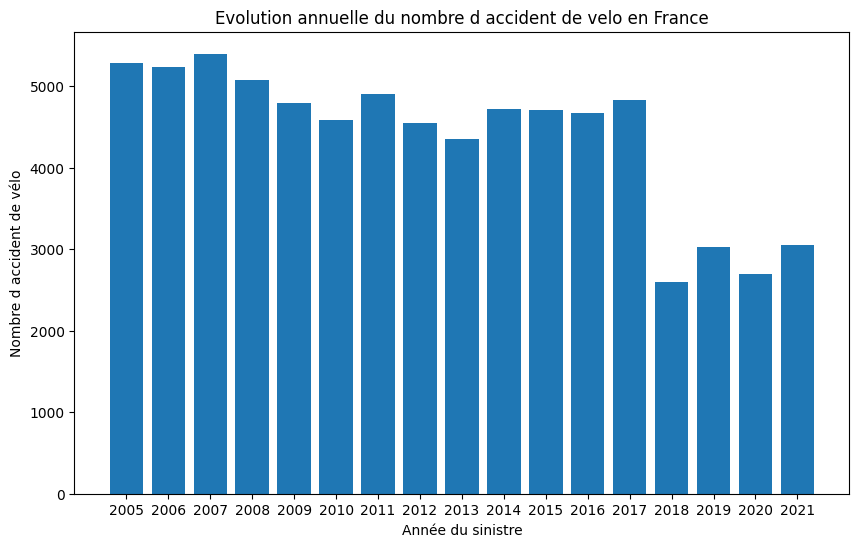

In [11]:
# Compter le nombre d'accident par an
acc_an = data['an'].value_counts().reset_index()
acc_an.columns = ['annee', 'nombre_accidents']

# affichage du nombre d'accident par an
plt.figure(figsize=(10, 6))

plt.bar(acc_an['annee'], acc_an['nombre_accidents'])
plt.xlabel('Année du sinistre')
plt.ylabel('Nombre d accident de vélo')
plt.xticks(acc_an['annee'])
plt.title('Evolution annuelle du nombre d accident de velo en France')
plt.show()

# Nombre de sinistres divisé par 2 à partir de 2018, impact du Covid?

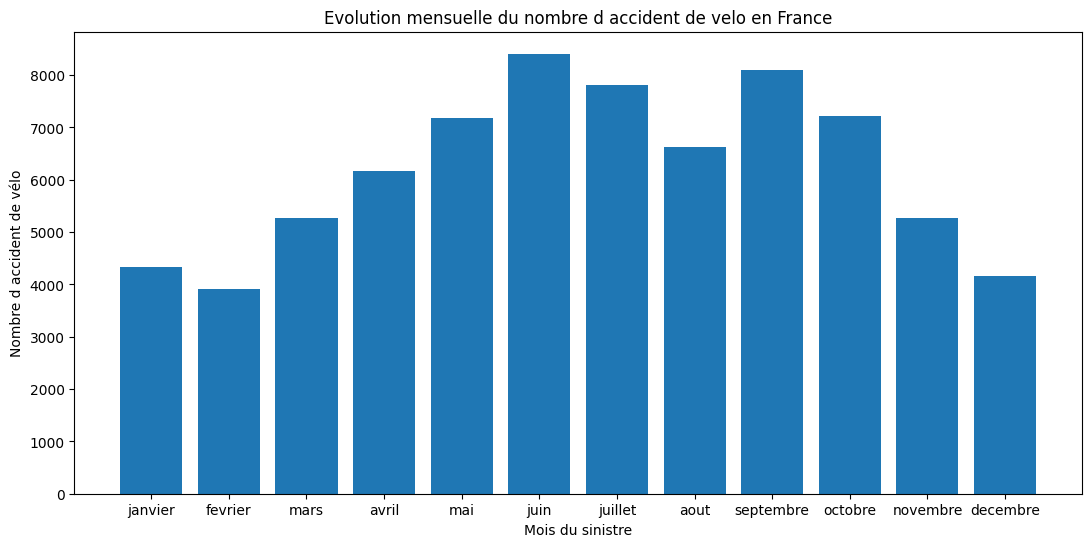

In [30]:
# Compter le nombre d'accident chaque mois
acc_mois = data['mois'].value_counts().reset_index()
# Liste des mois dans l'ordre de l'arrivée
ordre_des_mois = ["janvier", "fevrier", "mars", "avril", "mai", "juin", "juillet", "aout", "septembre", "octobre", "novembre", "decembre"]

acc_mois.columns = ['mois', 'nombre_accidents']

acc_mois['mois'] = pandas.Categorical(acc_mois['mois'], categories=ordre_des_mois, ordered=True)
acc_mois = acc_mois.sort_values(by='mois')

# affichage du nombre d'accident par mois
plt.figure(figsize=(13, 6))

plt.bar(acc_mois['mois'], acc_mois['nombre_accidents'])
plt.xlabel('Mois du sinistre')
plt.ylabel('Nombre d accident de vélo')
plt.xticks(rotation=0)
plt.xticks(acc_mois['mois'])
plt.title('Evolution mensuelle du nombre d accident de velo en France')
plt.show()

# Diminution du nombre d'accident de vélo en hiver: logique puisque moins de sortie en vélo lorsqu'il fait froid/nuit

#### Sorties graphiques carte de France

In [39]:
data=data.dropna(subset=['long'])
data=data.dropna(subset=['lat'])

#réduction de la table pour voir (janvier 2021)
data2021 = data[data.an==2012]
data2021 = data2021[data2021.mois == "janvier"]
data2021.head

# Création de la carte centrée sur la France
m = folium.Map(location=[46.603354, 1.888334], zoom_start=6)                                                              

# Parcourir les lignes du DataFrame pour ajouter des marqueurs sur la carte
for index, row in data2021.iterrows():
    latitude, longitude = row['lat'], row['long']
    gravite = row['grav']

    # Détermination de la couleur du marqueur en fonction de la gravité
    if gravite == 'Tué':
        marker_color = 'red'
    elif gravite == 'Indemne':
        marker_color = 'green'
    elif gravite == 'Blessé léger':
        marker_color = 'orange'
    elif gravite == 'Blessé hospitalisé':
        marker_color = 'blue'

    # Ajout d'un marqueur à la carte
    folium.Marker([latitude, longitude], icon=folium.Icon(icon='circle' , color=marker_color)).add_to(m)
    
m
# Enregistrement de la carte dans un fichier HTML
#m.save('carte_accidents_velo.html')

# Ouvrir la carte dans le navigateur par défaut
#import webbrowser
#webbrowser.open('carte_accidents_velo.html')